In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
netflix=pd.read_csv('./data/netflix_titles.csv')                ### link de descarga: https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download

In [26]:
netflix.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   release_year  8807 non-null   int64 
 4   rating        8803 non-null   object
 5   duration      8804 non-null   object
 6   listed_in     8807 non-null   object
 7   description   8807 non-null   object
dtypes: int64(1), object(7)
memory usage: 550.6+ KB


In [25]:
netflix= netflix.drop(columns=['director','cast','country','date_added'])

In [ ]:
###Accedo a valores nulos

netflix[netflix.rating.isnull()==True]

In [28]:
###ELiminar filas con rating y duration nulos

netflix=netflix.drop(netflix[netflix.rating.isnull()==True].index, axis=0)
netflix=netflix.drop(netflix[netflix.duration.isnull()==True].index, axis=0)

### OOOOOOOOOOOO
###     netflix.drop(netflix[netflix.duration.isnull()==True].index, axis=0, inplace=True)
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8800 entries, 0 to 8806
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8800 non-null   object
 1   type          8800 non-null   object
 2   title         8800 non-null   object
 3   release_year  8800 non-null   int64 
 4   rating        8800 non-null   object
 5   duration      8800 non-null   object
 6   listed_in     8800 non-null   object
 7   description   8800 non-null   object
dtypes: int64(1), object(7)
memory usage: 618.8+ KB


In [42]:
##Puede que necesitemos pasar 'objetos a int o float'
netflix.head()

,show_id,type,title,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8800 entries, 0 to 8806
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8800 non-null   object
 1   type          8800 non-null   object
 2   title         8800 non-null   object
 3   release_year  8800 non-null   int64 
 4   rating        8800 non-null   object
 5   duration      8800 non-null   object
 6   listed_in     8800 non-null   object
 7   description   8800 non-null   object
dtypes: int64(1), object(7)
memory usage: 618.8+ KB


<AxesSubplot:>

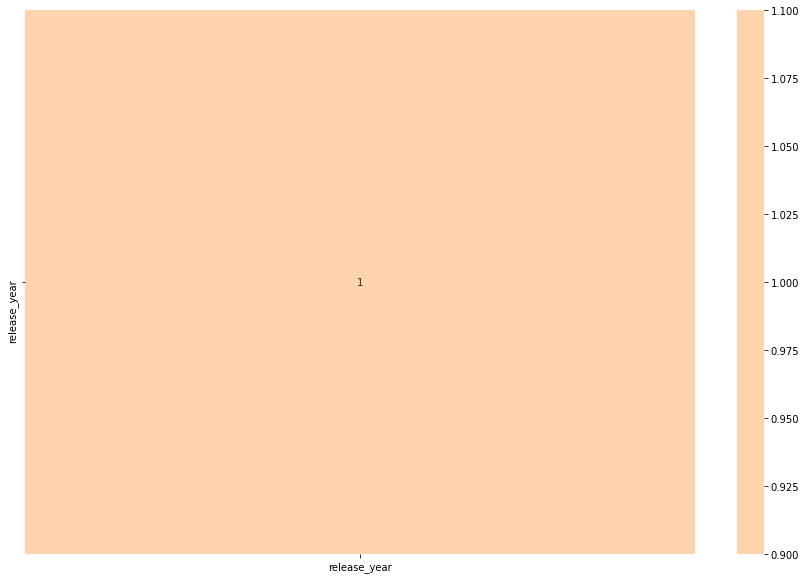

In [41]:
###Hacemos una prueba a ver si encontramos alguna correlacion evidente

correlacion= netflix.iloc[::].corr()
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(correlacion, center=0,annot=True)